Task 2: Stock Prices Prediction

## Problem Statement
Stock price prediction helps investors make informed trading decisions by forecasting the next day’s closing price based on historical stock data.

## Goal
- Load historical stock price data
- Prepare the dataset for prediction
- Train a regression model (Linear Regression)
- Evaluate model performance
- Visualize actual vs predicted stock prices

2️⃣ Step 1: Install and Import Libraries

In [ ]:

!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Step 2: Download Stock Data

Download historical stock data for Apple (AAPL) from Jan 1, 2022 to Jan 1, 2024 using yfinance.

In [ ]:
df = yf.download("AAPL", start="2022-01-01", end="2024-01-01")


# Show first rows
df.head()

/tmp/ipython-input-1266576308.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2022-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-01-03,178.103683,178.955022,173.895982,174.013402,104487900
2022-01-04,175.843231,179.013699,175.275678,178.710355,99310400
2022-01-05,171.165833,176.303156,170.891843,175.755177,94537600
2022-01-06,168.308517,171.537695,167.956243,168.993491,96904000
2022-01-07,168.474838,170.402559,167.359306,169.179387,86709100


Step 3: Prepare Dataset

- Predict next day’s closing price
- Create target column `Next_Close` by shifting the 'Close' column
- Drop the last row since it will have NaN
- Select features: Open, High, Low, Volume

In [ ]:
# Predict next day's closing price

df["Next_Close"] = df["Close"].shift(-1)

# Drop last row (because it will have NaN)
df = df.dropna()

In [ ]:
# Features and target
X = df[["Open", "High", "Low", "Volume"]]
y = df["Next_Close"]

Step 4: Train-Test Split

- Split the dataset into training (80%) and testing (20%) sets
- `shuffle=False` to preserve time order

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

Step 5: Train Linear Regression Model

- Fit a Linear Regression model on the training data

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Step 6: Make Predictions & Evaluate

- Predict next day’s closing prices
- Evaluate using Mean Squared Error (MSE)

In [ ]:
predictions = model.predict(X_test)

In [10]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 5.724214405614581


Step 7: Visualize Actual vs Predicted Prices

- Compare actual closing prices vs predicted prices using a line plot

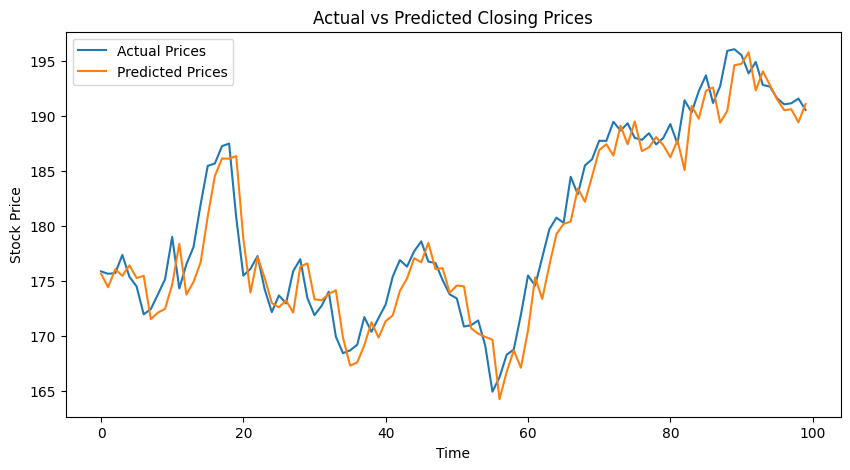

In [ ]:

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual Prices")
plt.plot(predictions, label="Predicted Prices")
plt.legend()
plt.title("Actual vs Predicted Closing Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()

Step 8: Insights and Conclusion

- Linear Regression can roughly predict the trend of stock prices, but financial data is highly volatile.
- Mean Squared Error gives a numerical estimate of prediction accuracy.
- Visual comparison shows the model captures general trends but may lag behind sharp price movements.
- Additional features or advanced models (like LSTM) could improve prediction performance.